In [13]:
# Colin Crowe
import capstone_utils as cu
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
raw = pd.read_csv("fork3.csv")
raw2 = pd.read_csv("fork3_intercon.csv")

In [8]:
# helper functions

def print_dict(dictionary):
    for i in dictionary.keys():
        print(str(i) + " | " + str(dictionary[i]))
    return

def get_base_infected(raw, num_nodes):
    '''Returns the total number of times each node got infected'''
    nodes = list(raw)
    nodes = nodes[:num_nodes+1]
    
    base_infected = {}
    
    for i in nodes:
        base_infected[i] = 0
        
    for i in nodes:
        for j in raw[i]:
            if j == 1:
                base_infected[i] += 1
                
    return base_infected

def get_inf_rates(raw, num_nodes, manhole):
    '''Returns the total number of times each node got infected
       given that one of the sewer nodes was samplable'''
    nodes = list(raw)
    nodes = nodes[:num_nodes+1]
    
    stats = {}
    stats['time'] = 0
    for i in nodes:
        stats[i] = 0
        
    for i in range(len(raw[manhole])):
        if raw[manhole][i] == 1:
            stats['time'] += 1
            for j in nodes:
                if raw[j][i] == 1:
                    stats[j] += 1
                    
    return stats

def get_ratio(one, two, tot_one, tot_two):
    ratios = {}
    for i in one.keys():
        ratios[i] = (one[i] / tot_one, two[i] / tot_two)
    return ratios

In [43]:
base = get_base_infected(raw, 28)
stats = get_inf_rates(raw, 28, '0-1-2')
ratio = get_ratio(base, stats, 50000, stats['time'])
print_dict(ratio)

0 | (0.08578, 0.46649227703039364)
1 | (0.086, 0.4684853014449427)
2 | (0.07936, 0.4520428500249128)
3 | (0.0719, 0.2034130543099153)
4 | (0.06208, 0.16853512705530643)
5 | (0.07114, 0.09853014449427006)
6 | (0.08024, 0.11484803188839063)
7 | (0.07538, 0.10538116591928251)
8 | (0.13194, 0.19294967613353264)
9 | (0.12874, 0.19656203288490284)
10 | (0.12834, 0.18011958146487295)
11 | (0.13818, 0.20254110612855009)
12 | (0.1315, 0.18310911808669655)
13 | (0.13604, 0.1933233682112606)
14 | (0.15306, 0.24613851519681115)
15 | (0.16022, 0.23467862481315396)
16 | (0.16284, 0.25448430493273544)
17 | (0.15776, 0.242152466367713)
18 | (0.16508, 0.2751619332336821)
19 | (0.16176, 0.24551569506726456)
20 | (0.17006, 0.2881165919282511)
21 | (0.1648, 0.2599651220727454)
22 | (0.095, 0.1269307424015944)
23 | (0.09018, 0.1340308918784255)
24 | (0.06858, 0.0931738913801694)
25 | (0.06896, 0.08395615346287992)
26 | (0.04456, 0.04895366218236173)
27 | (0.05648, 0.0666417538614848)
28 | (0.06946, 0.09105

In [44]:
base2 = get_base_infected(raw2, 28)
stats2 = get_inf_rates(raw2, 28, '0-1-2')
ratio2 = get_ratio(base2, stats2, 50000, stats2['time'])
print_dict(ratio2)

0 | (0.21476, 0.4930509930762622)
1 | (0.20574, 0.46237428614747056)
2 | (0.20972, 0.4821852731591449)
3 | (0.20458, 0.3669581038055289)
4 | (0.21814, 0.38656693788851265)
5 | (0.21346, 0.3791883559913074)
6 | (0.2209, 0.3809571941173498)
7 | (0.20808, 0.3633193510890989)
8 | (0.19976, 0.3572547632283823)
9 | (0.21174, 0.361348360034366)
10 | (0.20278, 0.3612978218021934)
11 | (0.21434, 0.3736291504523172)
12 | (0.21494, 0.3735280739879719)
13 | (0.2146, 0.36665487441249306)
14 | (0.2166, 0.37150654470106637)
15 | (0.21124, 0.3706473947541315)
16 | (0.22164, 0.37059685652195884)
17 | (0.20606, 0.3594784454439784)
18 | (0.2178, 0.37827866781219993)
19 | (0.21512, 0.3678172537524637)
20 | (0.21092, 0.36832263607419014)
21 | (0.21142, 0.35836660433618034)
22 | (0.21276, 0.37661090615050286)
23 | (0.22014, 0.37029362712892305)
24 | (0.20768, 0.35937736897963307)
25 | (0.22148, 0.37519583564966896)
26 | (0.21072, 0.3690807095567797)
27 | (0.2125, 0.37201192702279273)
28 | (0.20778, 0.351291

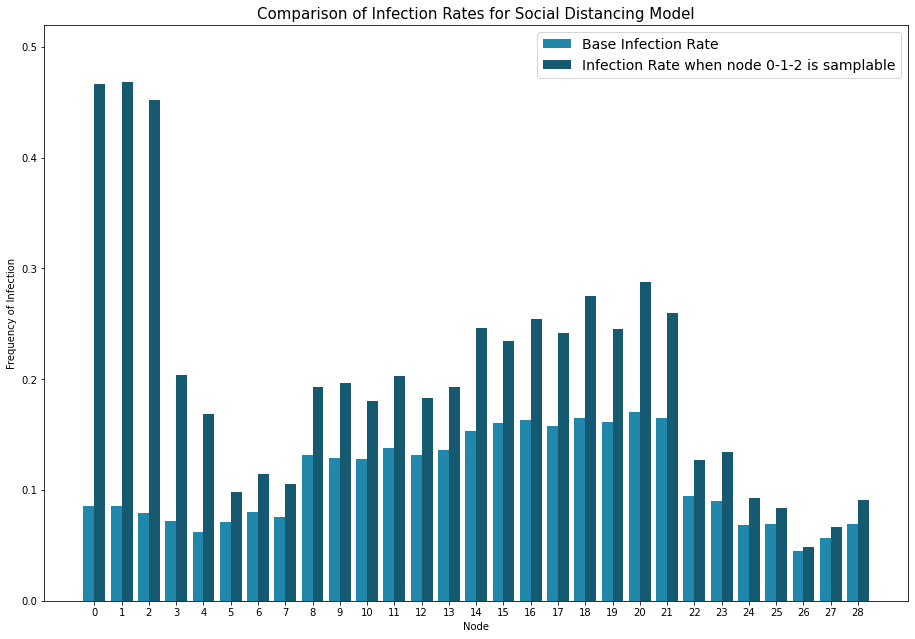

In [45]:
one, two, three, four = [], [], [], []
for i in ratio.keys():
    one.append(ratio[i][0])
    two.append(ratio[i][1])
    three.append(ratio2[i][0])
    four.append(ratio2[i][1])
    
data = [one, two, three, four]
X = np.arange(29)
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
ax.bar(X - 0.2, data[0], color = '#2187ab', width = 0.4)
ax.bar(X + 0.2, data[1], color = '#165a72', width = 0.4)
ax.set_ylabel('Frequency of Infection', fontsize=10)
ax.set_xlabel('Node', fontsize=10)
plt.legend(['Base Infection Rate', 'Infection Rate when node 0-1-2 is samplable'],loc=1,prop={'size': 14})
plt.title('Comparison of Infection Rates for Social Distancing Model', fontsize=15)
plt.ylim([0, 0.52])
locs, labels = plt.xticks(X)

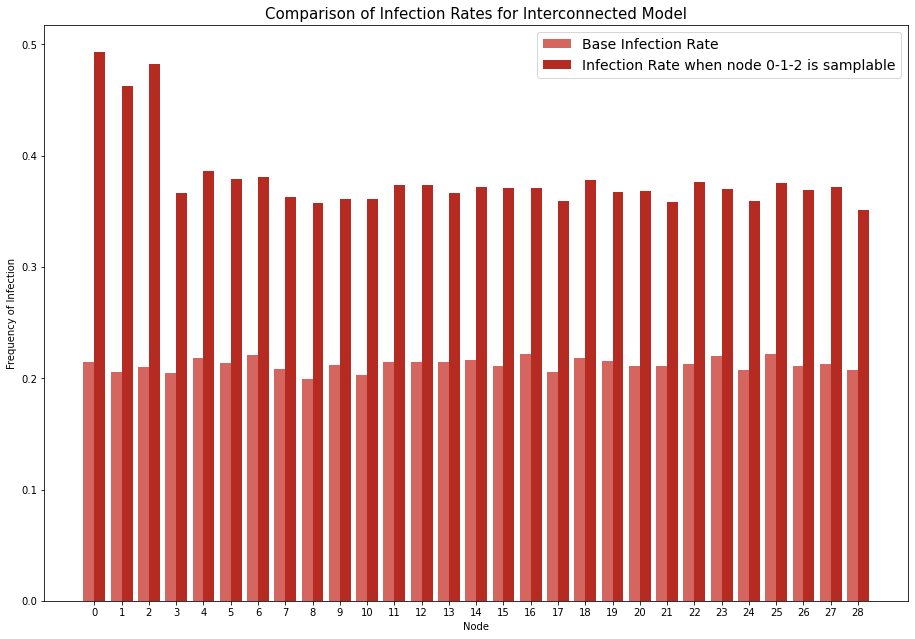

In [36]:
X = np.arange(29)
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
ax.bar(X - 0.2, data[2], color = '#d4665f', width = 0.4)
ax.bar(X + 0.2, data[3], color = '#b52a21', width = 0.4)
ax.set_ylabel('Frequency of Infection', fontsize=10)
ax.set_xlabel('Node', fontsize=10)
plt.legend(['Base Infection Rate', 'Infection Rate when node 0-1-2 is samplable'],loc=1,prop={'size': 14})
plt.title('Comparison of Infection Rates for Interconnected Model', fontsize=15)
locs, labels = plt.xticks(X)

In [37]:
base = get_base_infected(raw, 28)
stats = get_inf_rates(raw, 28, '4-6-7')
ratio = get_ratio(base, stats, 50000, stats['time'])
base2 = get_base_infected(raw2, 28)
stats2 = get_inf_rates(raw2, 28, '4-6-7')
ratio2 = get_ratio(base2, stats2, 50000, stats2['time'])

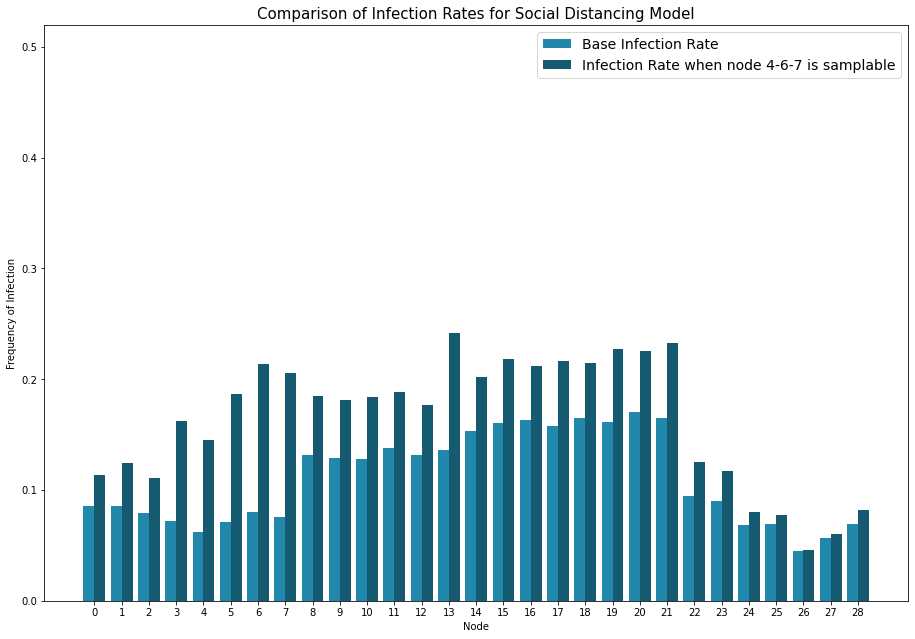

In [39]:
one, two, three, four = [], [], [], []
for i in ratio.keys():
    one.append(ratio[i][0])
    two.append(ratio[i][1])
    three.append(ratio2[i][0])
    four.append(ratio2[i][1])
    
data = [one, two, three, four]
X = np.arange(29)
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
ax.bar(X - 0.2, data[0], color = '#2187ab', width = 0.4)
ax.bar(X + 0.2, data[1], color = '#165a72', width = 0.4)
ax.set_ylabel('Frequency of Infection', fontsize=10)
ax.set_xlabel('Node', fontsize=10)
plt.legend(['Base Infection Rate', 'Infection Rate when node 4-6-7 is samplable'],loc=1,prop={'size': 14})
plt.title('Comparison of Infection Rates for Social Distancing Model', fontsize=15)
plt.ylim([0, 0.52])
locs, labels = plt.xticks(X)

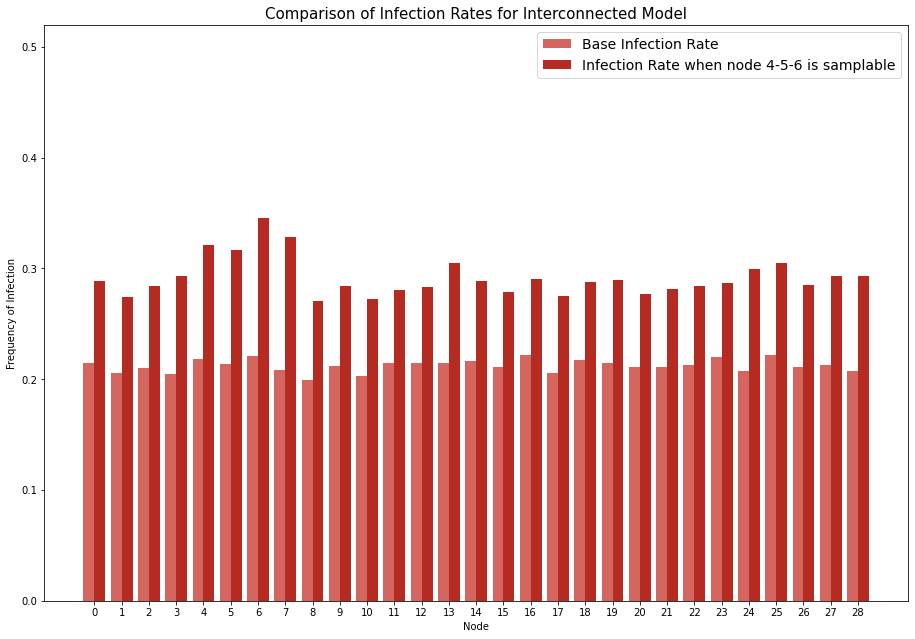

In [41]:
X = np.arange(29)
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
ax.bar(X - 0.2, data[2], color = '#d4665f', width = 0.4)
ax.bar(X + 0.2, data[3], color = '#b52a21', width = 0.4)
ax.set_ylabel('Frequency of Infection', fontsize=10)
ax.set_xlabel('Node', fontsize=10)
plt.legend(['Base Infection Rate', 'Infection Rate when node 4-5-6 is samplable'],loc=1,prop={'size': 14})
plt.title('Comparison of Infection Rates for Interconnected Model', fontsize=15)
plt.ylim([0, 0.52])
locs, labels = plt.xticks(X)

In [46]:
base = get_base_infected(raw, 28)
stats = get_inf_rates(raw, 28, '14-15-16-17')
ratio = get_ratio(base, stats, 50000, stats['time'])
base2 = get_base_infected(raw2, 28)
stats2 = get_inf_rates(raw2, 28, '14-15-16-17')
ratio2 = get_ratio(base2, stats2, 50000, stats2['time'])

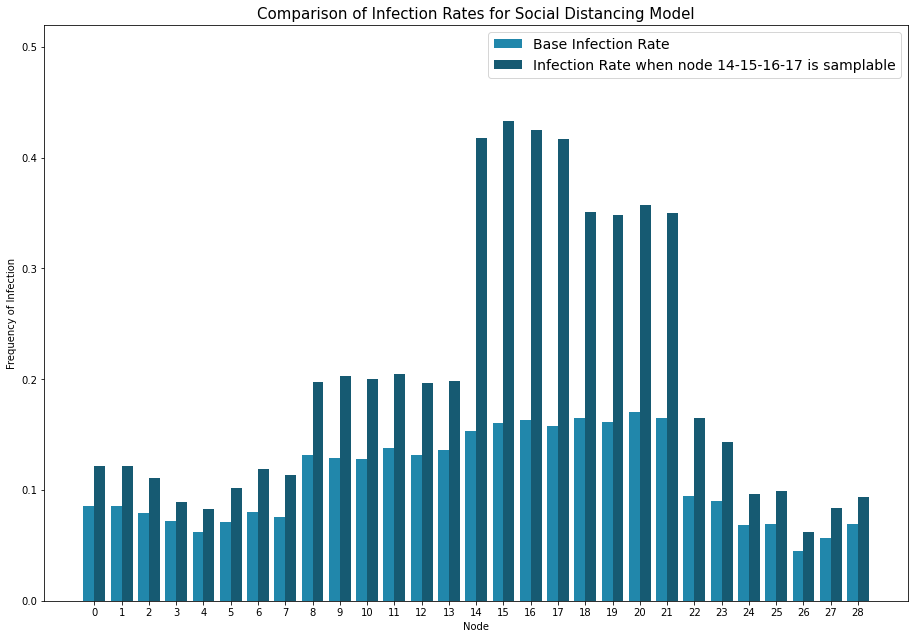

In [47]:
one, two, three, four = [], [], [], []
for i in ratio.keys():
    one.append(ratio[i][0])
    two.append(ratio[i][1])
    three.append(ratio2[i][0])
    four.append(ratio2[i][1])
    
data = [one, two, three, four]
X = np.arange(29)
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
ax.bar(X - 0.2, data[0], color = '#2187ab', width = 0.4)
ax.bar(X + 0.2, data[1], color = '#165a72', width = 0.4)
ax.set_ylabel('Frequency of Infection', fontsize=10)
ax.set_xlabel('Node', fontsize=10)
plt.legend(['Base Infection Rate', 'Infection Rate when node 14-15-16-17 is samplable'],loc=1,prop={'size': 14})
plt.title('Comparison of Infection Rates for Social Distancing Model', fontsize=15)
plt.ylim([0, 0.52])
locs, labels = plt.xticks(X)

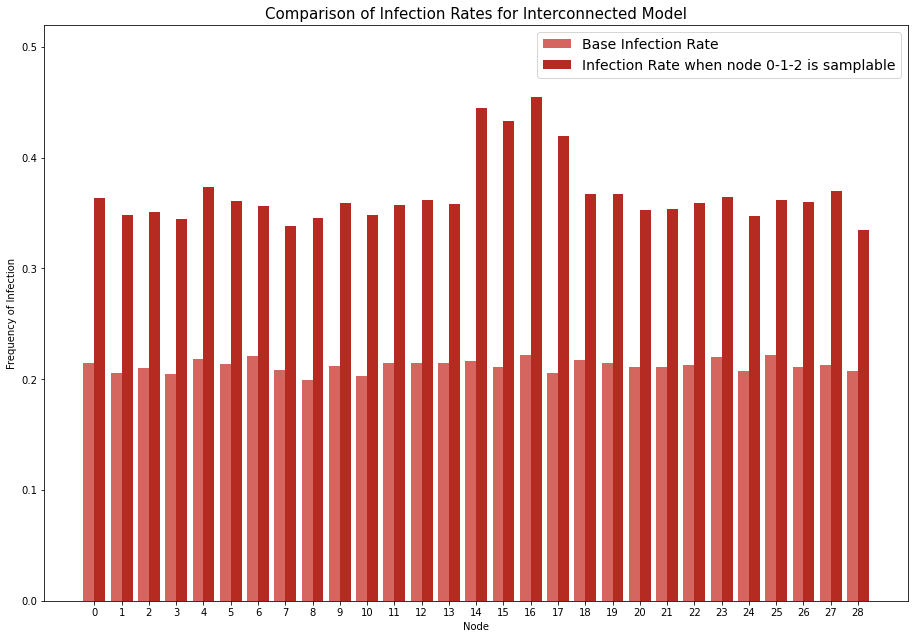

In [49]:
X = np.arange(29)
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
ax.bar(X - 0.2, data[2], color = '#d4665f', width = 0.4)
ax.bar(X + 0.2, data[3], color = '#b52a21', width = 0.4)
ax.set_ylabel('Frequency of Infection', fontsize=10)
ax.set_xlabel('Node', fontsize=10)
plt.legend(['Base Infection Rate', 'Infection Rate when node 0-1-2 is samplable'],loc=1,prop={'size': 14})
plt.title('Comparison of Infection Rates for Interconnected Model', fontsize=15)
plt.ylim([0, 0.52])
locs, labels = plt.xticks(X)